In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
Image_size=256
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Original Image",
    shuffle = True,
    image_size = (Image_size,Image_size)
)


Found 3200 files belonging to 16 classes.


In [35]:
n_classes=16
image_batch =32
class_names=dataset.class_names

In [ ]:
for label_batch ,image_batch in dataset.take(1):
    print(image_batch)
    print(label_batch.numpy())

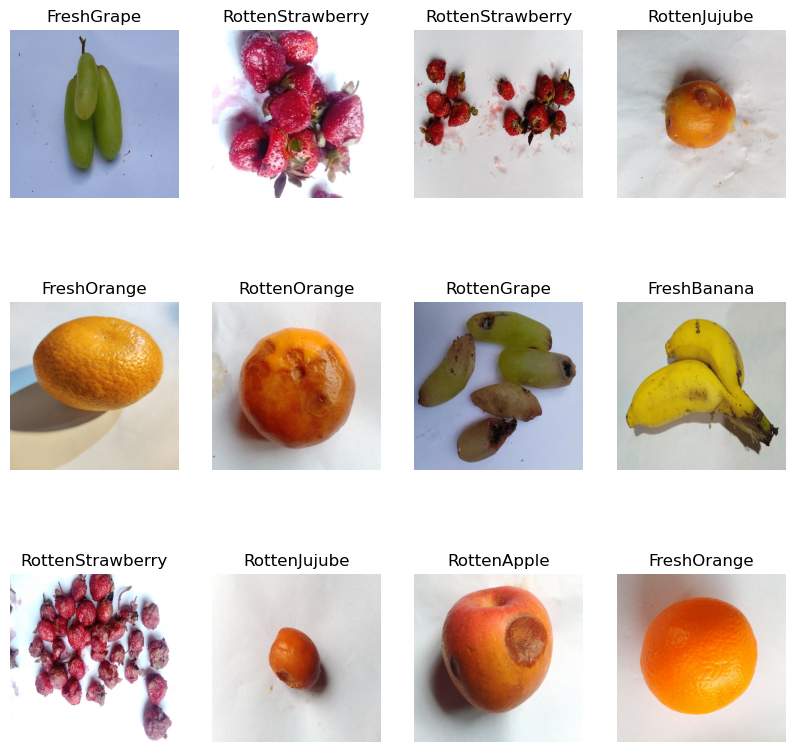

In [38]:
plt.figure(figsize=(10,10))
for  image_batch , label_batch in dataset.take(1):
     for i in range(12):
         ax=plt.subplot(3,4,i+1)
         plt.imshow(image_batch[i].numpy().astype("uint8"))
         plt.title(class_names[label_batch[i]])
         plt.axis("off")
         

In [39]:
len(dataset)

100

In [40]:
trian_size  =0.8
len(dataset)*0.8

80.0

In [41]:
train_ds = dataset.take(80)

In [42]:
test_size = 0.1
len(dataset)*0.1

10.0

In [45]:
test_ds=dataset.skip(80)
test_ds=dataset.take(10)

In [46]:
val_ds = dataset.skip(90)
val_ds =dataset.take(10)

In [48]:
len(train_ds), len(test_ds),len(val_ds)

(80, 10, 10)

In [54]:
#data agumentation 
from tensorflow.keras import layers, Sequential,models

In [58]:
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizental_and_verticle"),
    layers.RandomRotation(0.2),
])

In [59]:
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizental_and_verticle"),
    layers.RandomRotation(0.2),
])

In [62]:
#scaling and resizing 
data_resize = Sequential([
    layers.Resizing(Image_size,Image_size),
    layers.Rescaling(1./255),
])

In [63]:
train_ds = train_ds.map(
    lambda x, y: (data_agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:


IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 16

# Define the Sequential model
model = models.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
    

C:\Users\gurud\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer= "adam", loss="SparseCategoricalCrossentropy" , metrics = ['accuracy'])
history=model.fit(train_ds ,batch_size =32 ,epochs =10 , validation_data = val_ds , verbose =1 )

In [ ]:
history
history.params
history.histrory.keys()
type(history.history['loss'])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss  =history.history['val_loss']
import numpy as np
for label_batch  , image_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('int8')
    first_label = label_batch[0].numpy()
    print("first img to predict")
    plt.imshow(first_image)
    plt("actual label" , class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:" , class_names[np.agrmax(batch_prediction[0])])

In [ ]:
def predict(model , img):
    img_array = tf.keras.preprocessing.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array ,0 )
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(predictions[0])) , 2)
    return predicted_class ,confidence

In [ ]:
model_version = 1
model.save(f"../models/{model_version}.keras")  # or use .h5 if you prefer
import os

model_version = 1
model_dir = "../models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
model.save(f"{model_dir}/{model_version}.keras")